In [1]:
import pandas as pd
import jellyfish
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('E2_A_NoisySet')
df=df.drop(df.columns[[0]] , 1)
df

STD_Months 10_Percent 20_Percent 30_Percent 40_Percent 50_Percent  \
0     February   Februtry   Febrparx   debruark   nebruury   Febizayy   
1     December   Decemier   Decetber   Decembkn   Deczmnsr   Denekzee   
2     November   Ngvember   Noremjer   ouvember   Novxmbqa   joeeqxer   
3     December   Decembed   Decerber   Decembea   oicedber   Docmmdeh   
4     November   Novembar   aovembew   jovtmber   Noueoqer   aovembbb   
5     November   November   Nocemoer   Norembeh   oyvembej   Nlvvqqer   
6     November   Novembem   Npvemxer   Novemfem   eovcqber   nrvtmbmr   
7     December   Drcember   Decleber   Dtcemben   yncembxr   neneqbem   
8     November   Novemblr   Novemter   yovember   Novffben   vocembep   
9     November   Novembee   Novetcer   Novfwber   Nohedbxr   vtvlmbhr   
10    November   November   Nojembeh   Nonembnr   iovtmuer   unveebcr   
11    February   Feuruary   Febrrarq   Februtky   Febiiaiy   Fvdrvari   
12    February   February   Floruary   Februaed   Fmbruify   jebrramy   
13    December   Decnmber   eecembes   Decfmbel   Deoerbet   Decewgvo   
14    November   Novcmber   Novqmbeo   Nogembvr   Nomemidr   Noreibmr   
15    February   Februafy   Fexruany   Februbry   Febvclry   Februdmo   
16    February   Februwry   Fabrxary   Fewruarx   uebiuary   Fknruawy   
17    December   secember   Decotber   Desembeg   xecowber   zesimbtr   
18    December   Decemcer   gecfmber   Dectmner   tecombbr   Decelwzm   
19    December   fecember   Decegbrr   Decembir   Ducesbej   Dectxjey   
20    November   hovember   Novzmbeu   Noiexber   Nonkmbey   Noibmbpu   
21    February   Februvry   Febzuazy   Fegruayy   Fibrurrk   Fkbruuev   
22    November   Novhmber   Novxmjer   Njvenber   hosgmber   Nevewbsa   
23    December   oecember   Deseuber   Dmcemoer   zecnmker   Dxcqmqxr   
24    February   Februare   rebruary   Feoruady   Fehiuqry   Fezcbjry   
25    November   Novembdr   Nowmmber   Novemlxr   uhvember   Nlcevbir   
26    December   Deeember   Dscembur   Deczmbyr   Deceprel   Dejedblu   
27    November   fovember   vovebber   Novhxber   Nhvwmoer   Noferbxg   
28    November   Noveober   Navemyer   ioveiber   Nodeebei   Novefibu   
29    November   xovember   Novlmbej   qovefber   Nokdgber   mzaemuer   
..         ...        ...        ...        ...        ...        ...   
90    November   Noveaber   sgvember   Novedbey   Nowdmbey   zhvhmbjr   
91    December   Decrmber   Docemser   jecevber   Decbwbes   Dlcexbge   
92    December   Decemger   Dmcemter   Deretber   oecwaber   Deueqyur   
93    February   Fibruary   Frbruarn   rebrsary   Fbbphary   doxruery   
94    December   iecember   Decesbed   Decteber   beceabvr   Decgzbpp   
95    February   Februvry   Febrwary   Fpbruavy   vebdfary   xubruaaj   
96    December   Decemher   eecembei   Decembqp   regemler   debhlber   
97    November   November   wovelber   Nouemper   coxemrer   Ndvemfco   
98    December   Decembkr   vezember   Deceaoer   Deqeager   Docrsbqr   
99    November   Novemser   Novbmbey   mokember   Nowejbew   kolusber   
100   December   Dezember   Decjmbez   Decemovr   ueceiler   Drcrdrer   
101   December   Decembdr   Dedmmber   Deqemter   iedember   Dgceejeg   
102   November   Novemher   Navetber   eovvmber   qovedker   Nyreibeu   
103   November   Novelber   Nooembeb   Novnmbfr   Nzvembec   cogeabek   
104   February   Febcuary   eebrmary   kebrfary   xdyruary   kenzrary   
105   November   wovember   Nonymber   Nmvember   Noqejbmr   oovexbri   
106   February   vebruary   qebrdary   Fetrsary   Fmbruait   ujbcuayy   
107   November   Novembea   Novembwr   rocember   Novembpi   Nkvxzder   
108   November   lovember   bovimber   Novembwn   govemqez   Nrbemref   
109   December   Decembrr   Deyumber   Deyember   sefemper   jebdmbew   
110   November   Nfvember   Novimaer   anvember   ievembar   fovpebtr   
111   December   Decwmber   Decjmbyr   Devembex   Dexemser   vbcbmbor   
112   December   recember   Decevbej   Decmmbur   Debemyhr   g

In [3]:
import jellyfish
#Jaro Distance    
months = ["November", "February", "December"]
colnames=list(df.columns.values)
for x in colnames:
    if x!='STD_Months':
        col=x
        print(col)
        df[col+'_Jaro'] = ''
        ix = [(row) for row in range(df[col].shape[0])]
        for row in ix:
            print("row: " , row)
            Jaro_best = 0
            best_match = ''
            for month in months:
                s1 = df[col].iat[row]
                print("s1: " , s1 )
                s2 = month        
                print("s2: " , s2)
                Jd = jellyfish.jaro_distance(s1 , s2)
                print("Jaro Distance :" , Jd)
                if Jd >= Jaro_best:
                    Jaro_best = Jd
                    best_match = s2
                df[col+'_Jaro'].iat[row] = best_match
                print('\n')
            print("Best Match: " , best_match)
            print("Jaro_best: " , Jaro_best)        
            print("*******")       

10_Percent
row:  0
s1:  Februtry
s2:  November
Jaro Distance : 0.5833333333333334


s1:  Februtry
s2:  February
Jaro Distance : 0.9166666666666666


s1:  Februtry
s2:  December
Jaro Distance : 0.5833333333333334


Best Match:  February
Jaro_best:  0.9166666666666666
*******
row:  1
s1:  Decemier
s2:  November
Jaro Distance : 0.5833333333333334


s1:  Decemier
s2:  February
Jaro Distance : 0.5


s1:  Decemier
s2:  December
Jaro Distance : 0.9166666666666666


Best Match:  December
Jaro_best:  0.9166666666666666
*******
row:  2
s1:  Ngvember
s2:  November
Jaro Distance : 0.9166666666666666


s1:  Ngvember
s2:  February
Jaro Distance : 0.5833333333333334


s1:  Ngvember
s2:  December
Jaro Distance : 0.65


Best Match:  November
Jaro_best:  0.9166666666666666
*******
row:  3
s1:  Decembed
s2:  November
Jaro Distance : 0.5416666666666666


s1:  Decembed
s2:  February
Jaro Distance : 0.5


s1:  Decembed
s2:  December
Jaro Distance : 0.9166666666666666


Best Match:  December
Jaro_best:  0.91

In [4]:
#Jaro Accuracy
from sklearn.metrics import accuracy_score

NameOfColumns = list(df)
JaroAccuracy = []
for x in NameOfColumns:
    if "Jaro" in x:
        print("Jaro Accuracy : " , accuracy_score(df["STD_Months"] , df[x])) 
        JaroAccuracy.append(accuracy_score(df["STD_Months"] , df[x]))
print(JaroAccuracy)

Jaro Accuracy :  0.991666666667
Jaro Accuracy :  0.991666666667
Jaro Accuracy :  0.983333333333
Jaro Accuracy :  0.958333333333
Jaro Accuracy :  0.941666666667
Jaro Accuracy :  0.816666666667
Jaro Accuracy :  0.625
Jaro Accuracy :  0.758333333333
Jaro Accuracy :  0.558333333333
Jaro Accuracy :  0.4
[0.9916666666666667, 0.9916666666666667, 0.98333333333333328, 0.95833333333333337, 0.94166666666666665, 0.81666666666666665, 0.625, 0.7583333333333333, 0.55833333333333335, 0.40000000000000002]


In [5]:
import numpy as np
#Creating an empty DataFrame
columns = ['Original']
diff = pd.DataFrame(index=range(0,121) , columns=columns)
diff['Original'] = df['STD_Months']

#Iterate ove the transformed columns 
percentage = [10 , 20 ,30 ,  40 , 50 , 60 , 70 , 80 , 90 , 100]

for p in percentage:
    """Counting #of wrong transformations"""
    diff['Transformation_' + str(p)] = ''
    c = np.where(df['STD_Months'] != df[ str(p) +'_Percent_Jaro'])
    
    if len(c[0]) > 0 :    
        for x in np.nditer(c):        
            x = int(x)
            diff['Transformation_' + str(p)].iat[x] = df[ str(p) + '_Percent_Jaro'].iat[x]
diff     

Original Transformation_10 Transformation_20 Transformation_30  \
0    February                                                         
1    December                                                         
2    November                                                         
3    December                                                         
4    November                                                         
5    November                                                         
6    November                                                         
7    December                                                         
8    November                                                         
9    November                                                         
10   November                                                         
11   February                                                         
12   February                                                         
13   December                                                         
14   November                                                         
15   February                                                         
16   February                                                         
17   December                                                         
18   December                                                         
19   December                                                         
20   November                                                         
21   February                                                         
22   November                                                         
23   December                                                         
24   February                                                         
25   November                                                         
26   December                                                         
27   November                                                         
28   November                                                         
29   November                                                         
..        ...               ...               ...               ...   
91   December                            November                     
92   December                                                         
93   February                                                         
94   December                                                         
95   February                                                         
96   December                                                         
97   November                                                         
98   December                                                         
99   November                                                         
100  December                                                         
101  December                                                         
102  November                                                         
103  November                                                         
104  February                                                         
105  November                                                         
106  February                                                         
107  November                                                         
108  November                                                         
109  December                                                         
110  November                                                         
111  December                                                         
112  December                                                         
113  February                                                         
114  December                                                         
115  February                

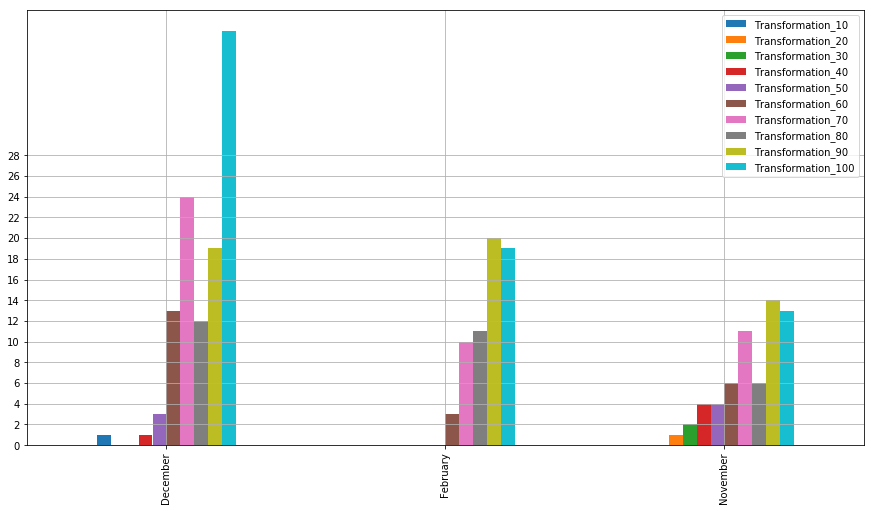

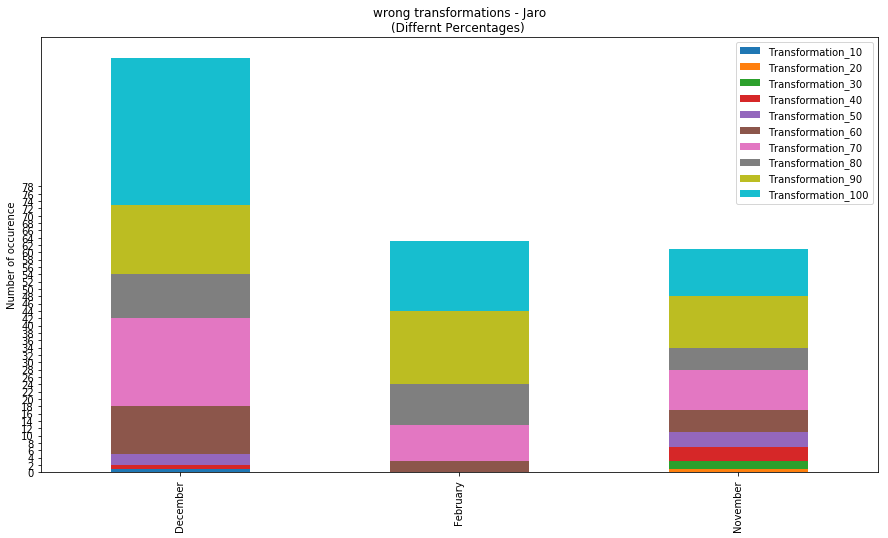

In [6]:
wrong = diff.apply(pd.Series.value_counts)
wrong = wrong.drop(wrong.index[0])
del wrong['Original']
wrong.plot.bar(figsize=(15, 8))
plt.yticks(range(0 , 30 ,2))
plt.grid()
wrong.plot.bar(figsize=(15, 8) ,stacked=True)
plt.yticks(range(0 , 80 ,2))
plt.ylabel('Number of occurence')
plt.title('wrong transformations - Jaro\n(Differnt Percentages) ')
plt.show()

In [7]:
#Creating an empty DataFrame
columns = ['Original']
Result = pd.DataFrame(index=range(0,120) , columns=columns)
Result['Noisy Form'] = ''
Result['Transfromation'] = ''
#Iterate ove the transformed columns 
per = [10 , 20 ,  40 , 50 , 60 , 70 , 80 , 90 , 100]

for p in percentage:
    c = np.where(df['STD_Months'] != df[str(p) +'_Percent_Jaro'])
    
    if(len(c[0])>0):
        print(str(p) + '_Percent')             
        for ind in np.nditer(c):            
            ind = int(ind)
            x = diff['Original'].iloc[ind]
            y = diff['Transformation_' + str(p)].iloc[ind]
            z = df[str(p) + '_Percent'].iloc[ind]
            Result['Original'].iloc[ind] = x
            Result['Noisy Form'].iloc[ind] = z
            Result['Transfromation'].iloc[ind] = y                   
            print('{} To {}'.format(x , y))
            print('Noisy form:' , z)
            print('\n')
        print('********') 

10_Percent
November To December
Noisy form: eovember


********
20_Percent
December To November
Noisy form: Docemser


********
30_Percent
December To November
Noisy form: jlcember


December To November
Noisy form: Dbvember


********
40_Percent
December To November
Noisy form: oicedber


December To November
Noisy form: phcember


December To November
Noisy form: oecwaber


November To December
Noisy form: ievembar


December To November
Noisy form: dfcembej


********
50_Percent
November To December
Noisy form: joeeqxer


November To December
Noisy form: jykembar


December To November
Noisy form: uguemben


December To November
Noisy form: pevsmbar


November To December
Noisy form: uivcmbvr


December To November
Noisy form: femzmner


December To November
Noisy form: debhlber


********
60_Percent
November To December
Noisy form: wkkeabxr


November To December
Noisy form: doawcbev


February To December
Noisy form: sexauabv


December To November
Noisy form: ovsemgwr


November 

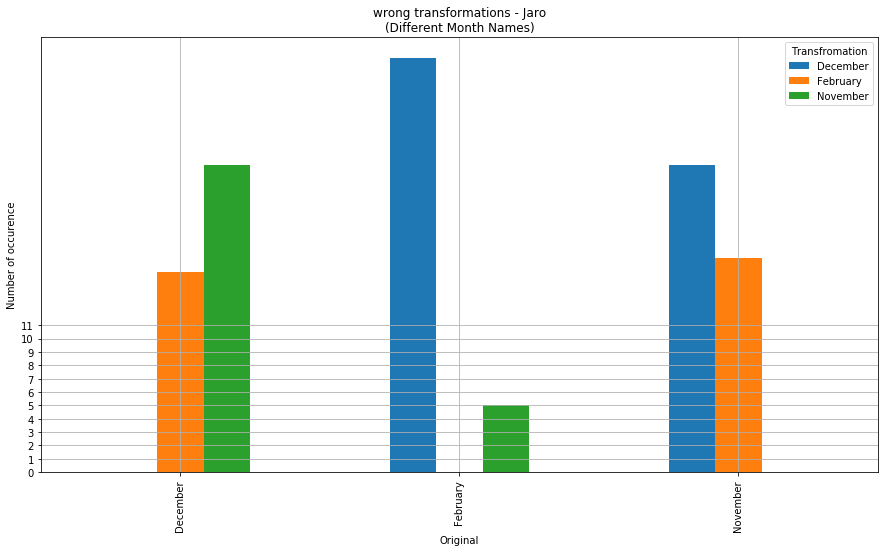

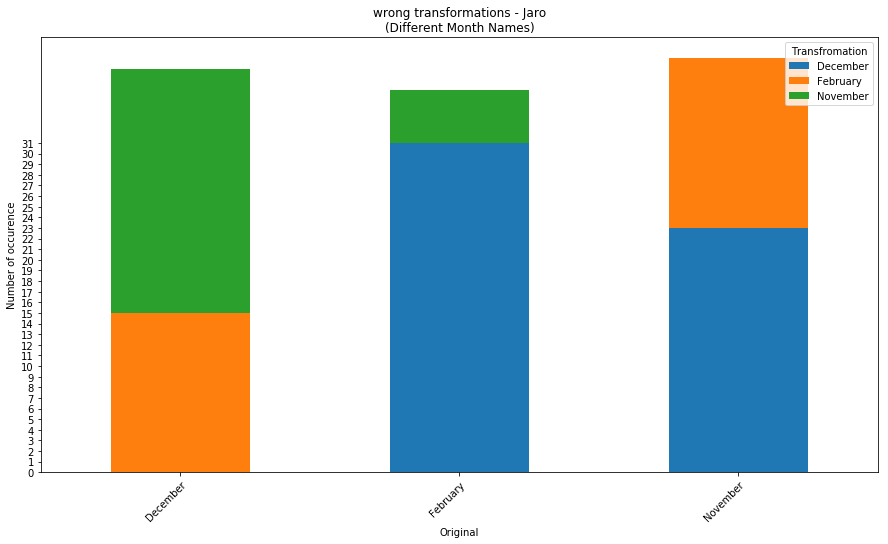

In [8]:
grouped = Result.groupby(['Original' , 'Transfromation'])
new = grouped.size().unstack()
new.plot.bar(figsize=(15, 8))
plt.ylabel('Number of occurence')
plt.title('wrong transformations - Jaro\n(Different Month Names)')
plt.yticks(range(0 , 12))
plt.grid()
new.plot.bar(figsize=(15, 8) ,stacked=True)
plt.xticks(rotation='45', rotation_mode='anchor', ha='right')
plt.yticks(range(0 , 32))
plt.ylabel('Number of occurence')
plt.title('wrong transformations - Jaro\n(Different Month Names)')
plt.show()

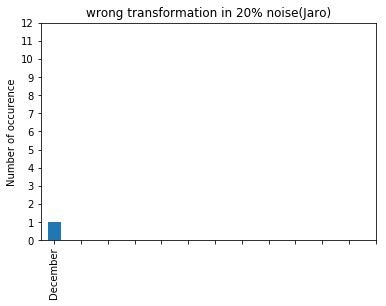

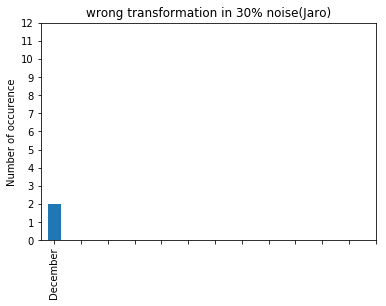

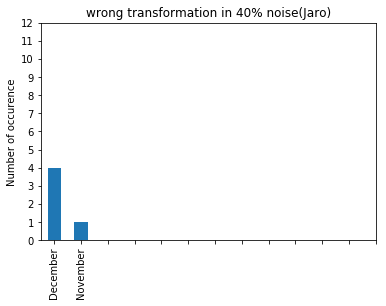

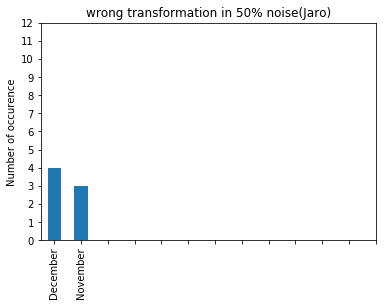

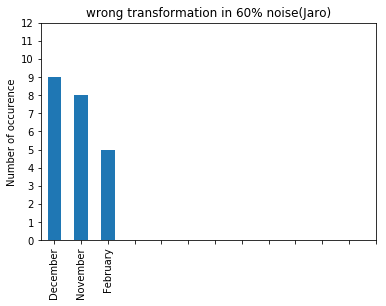

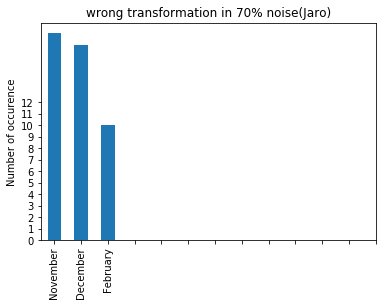

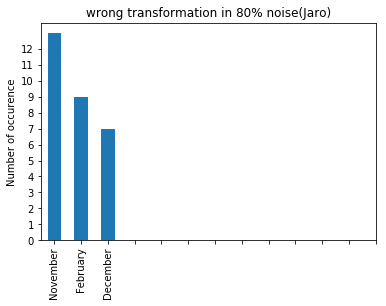

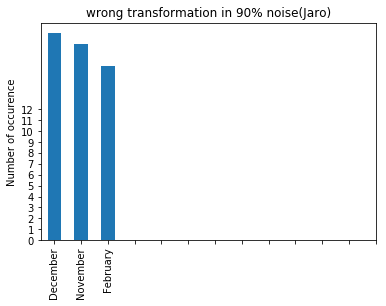

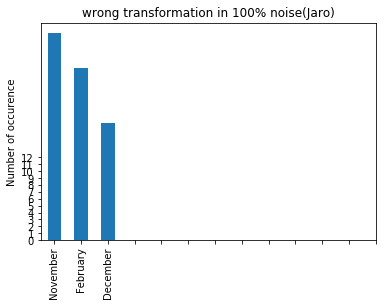

In [9]:
import numpy as np

#Iterate ove the transformed columns 
per = [20 ,30 ,  40 , 50 , 60 , 70 , 80 , 90 , 100]

for p in per:
    c = np.where(df['STD_Months'] != df[str(p) +'_Percent_Jaro'])
    columns = ['Original' , 'Transformation']
    diff = pd.DataFrame(index=range(0,121) , columns=columns)
    diff['Transformation_' + str(p)] = ''
    diff[str(p) + '_Percent'] = ''
    for x in np.nditer(c):
        x = int(x)
        diff['Original'].iat[x] = df['STD_Months'].iat[x]
        diff[str(p) + '_Percent'].iat[x] = df[str(p) + '_Percent'].iat[x]
        diff['Transformation'].iat[x] = df[str(p) + '_Percent_Jaro'].iat[x]
    diff.dropna()
    wrongTransform = diff['Original'].value_counts()
    wrongTransform.plot.bar()
    plt.yticks(range(0 , 13))
    plt.ylabel('Number of occurence')
    plt.title('wrong transformation in {}% noise(Jaro)'.format(p))
    plt.xticks(range(0,13))
    plt.show()